# Boston House Price Predictions

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading files
m = pd.read_csv("Boston.csv",header = None)

In [3]:
mx = pd.read_csv("Boston_Train.csv",header= None)

In [4]:
my = pd.read_csv("Boston_Test.csv",header= None)

In [5]:
m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,1.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,2.0,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,3.0,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,4.0,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,502.0,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,503.0,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,504.0,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,505.0,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [6]:
#Defining columns names
cols = [0,"Crime_Rate","Zoned","Non-Rental-Business","Charles_river","No2","Rooms","Age_of_Owner","Dist_Employ-Center","RAD","Tax","Pupil-teacher Ratio","Blacks","Lower status of town","MedV"]

In [7]:
m.columns = cols 

In [8]:
for col in m.columns:
    print('{}:{}'.format(col,m[col].unique()))
    

0:[ nan   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196

In [9]:
m

,0,Crime_Rate,Zoned,Non-Rental-Business,Charles_river,No2,Rooms,Age_of_Owner,Dist_Employ-Center,RAD,Tax,Pupil-teacher Ratio,Blacks,Lower status of town,MedV
0,NaN,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,1.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,2.0,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,3.0,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,4.0,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,502.0,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,503.0,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,504.0,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,505.0,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


Removing row

In [10]:
m.dropna(axis = 0,inplace = True)

In [11]:
m

,0,Crime_Rate,Zoned,Non-Rental-Business,Charles_river,No2,Rooms,Age_of_Owner,Dist_Employ-Center,RAD,Tax,Pupil-teacher Ratio,Blacks,Lower status of town,MedV
1,1.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,2.0,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,3.0,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,4.0,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,5.0,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,502.0,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,503.0,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,504.0,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,505.0,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


Checking Data Type of columns

In [12]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0                     506 non-null    float64
 1   Crime_Rate            506 non-null    object 
 2   Zoned                 506 non-null    object 
 3   Non-Rental-Business   506 non-null    object 
 4   Charles_river         506 non-null    object 
 5   No2                   506 non-null    object 
 6   Rooms                 506 non-null    object 
 7   Age_of_Owner          506 non-null    object 
 8   Dist_Employ-Center    506 non-null    object 
 9   RAD                   506 non-null    object 
 10  Tax                   506 non-null    object 
 11  Pupil-teacher Ratio   506 non-null    object 
 12  Blacks                506 non-null    object 
 13  Lower status of town  506 non-null    object 
 14  MedV                  506 non-null    object 
dtypes: float64(1), object(1

Converting object Datatypes to integer type

In [13]:
m["Crime_Rate"]=m["Crime_Rate"].apply(pd.to_numeric)

In [14]:
m[["Zoned","Non-Rental-Business","Charles_river","No2","Rooms","Age_of_Owner","Dist_Employ-Center","RAD","Tax","Pupil-teacher Ratio","Blacks","Lower status of town","MedV"]]=m[["Zoned","Non-Rental-Business","Charles_river","No2","Rooms","Age_of_Owner","Dist_Employ-Center","RAD","Tax","Pupil-teacher Ratio","Blacks","Lower status of town","MedV"]].apply(pd.to_numeric)

In [15]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0                     506 non-null    float64
 1   Crime_Rate            506 non-null    float64
 2   Zoned                 506 non-null    float64
 3   Non-Rental-Business   506 non-null    float64
 4   Charles_river         506 non-null    int64  
 5   No2                   506 non-null    float64
 6   Rooms                 506 non-null    float64
 7   Age_of_Owner          506 non-null    float64
 8   Dist_Employ-Center    506 non-null    float64
 9   RAD                   506 non-null    int64  
 10  Tax                   506 non-null    int64  
 11  Pupil-teacher Ratio   506 non-null    float64
 12  Blacks                506 non-null    float64
 13  Lower status of town  506 non-null    float64
 14  MedV                  506 non-null    float64
dtypes: float64(12), int64(3

Checking correlation

In [16]:
m.corr()

,0,Crime_Rate,Zoned,Non-Rental-Business,Charles_river,No2,Rooms,Age_of_Owner,Dist_Employ-Center,RAD,Tax,Pupil-teacher Ratio,Blacks,Lower status of town,MedV
0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
Crime_Rate,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zoned,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non-Rental-Business,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
Charles_river,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
No2,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Rooms,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
Age_of_Owner,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Dist_Employ-Center,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


Ploting Rooms and Prices which are correlated

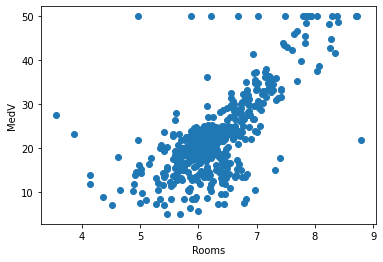

In [17]:
plt.scatter(m["Rooms"],m["MedV"])
plt.xlabel("Rooms")
plt.ylabel("MedV")
plt.show()


Checking through plots which one is closely related

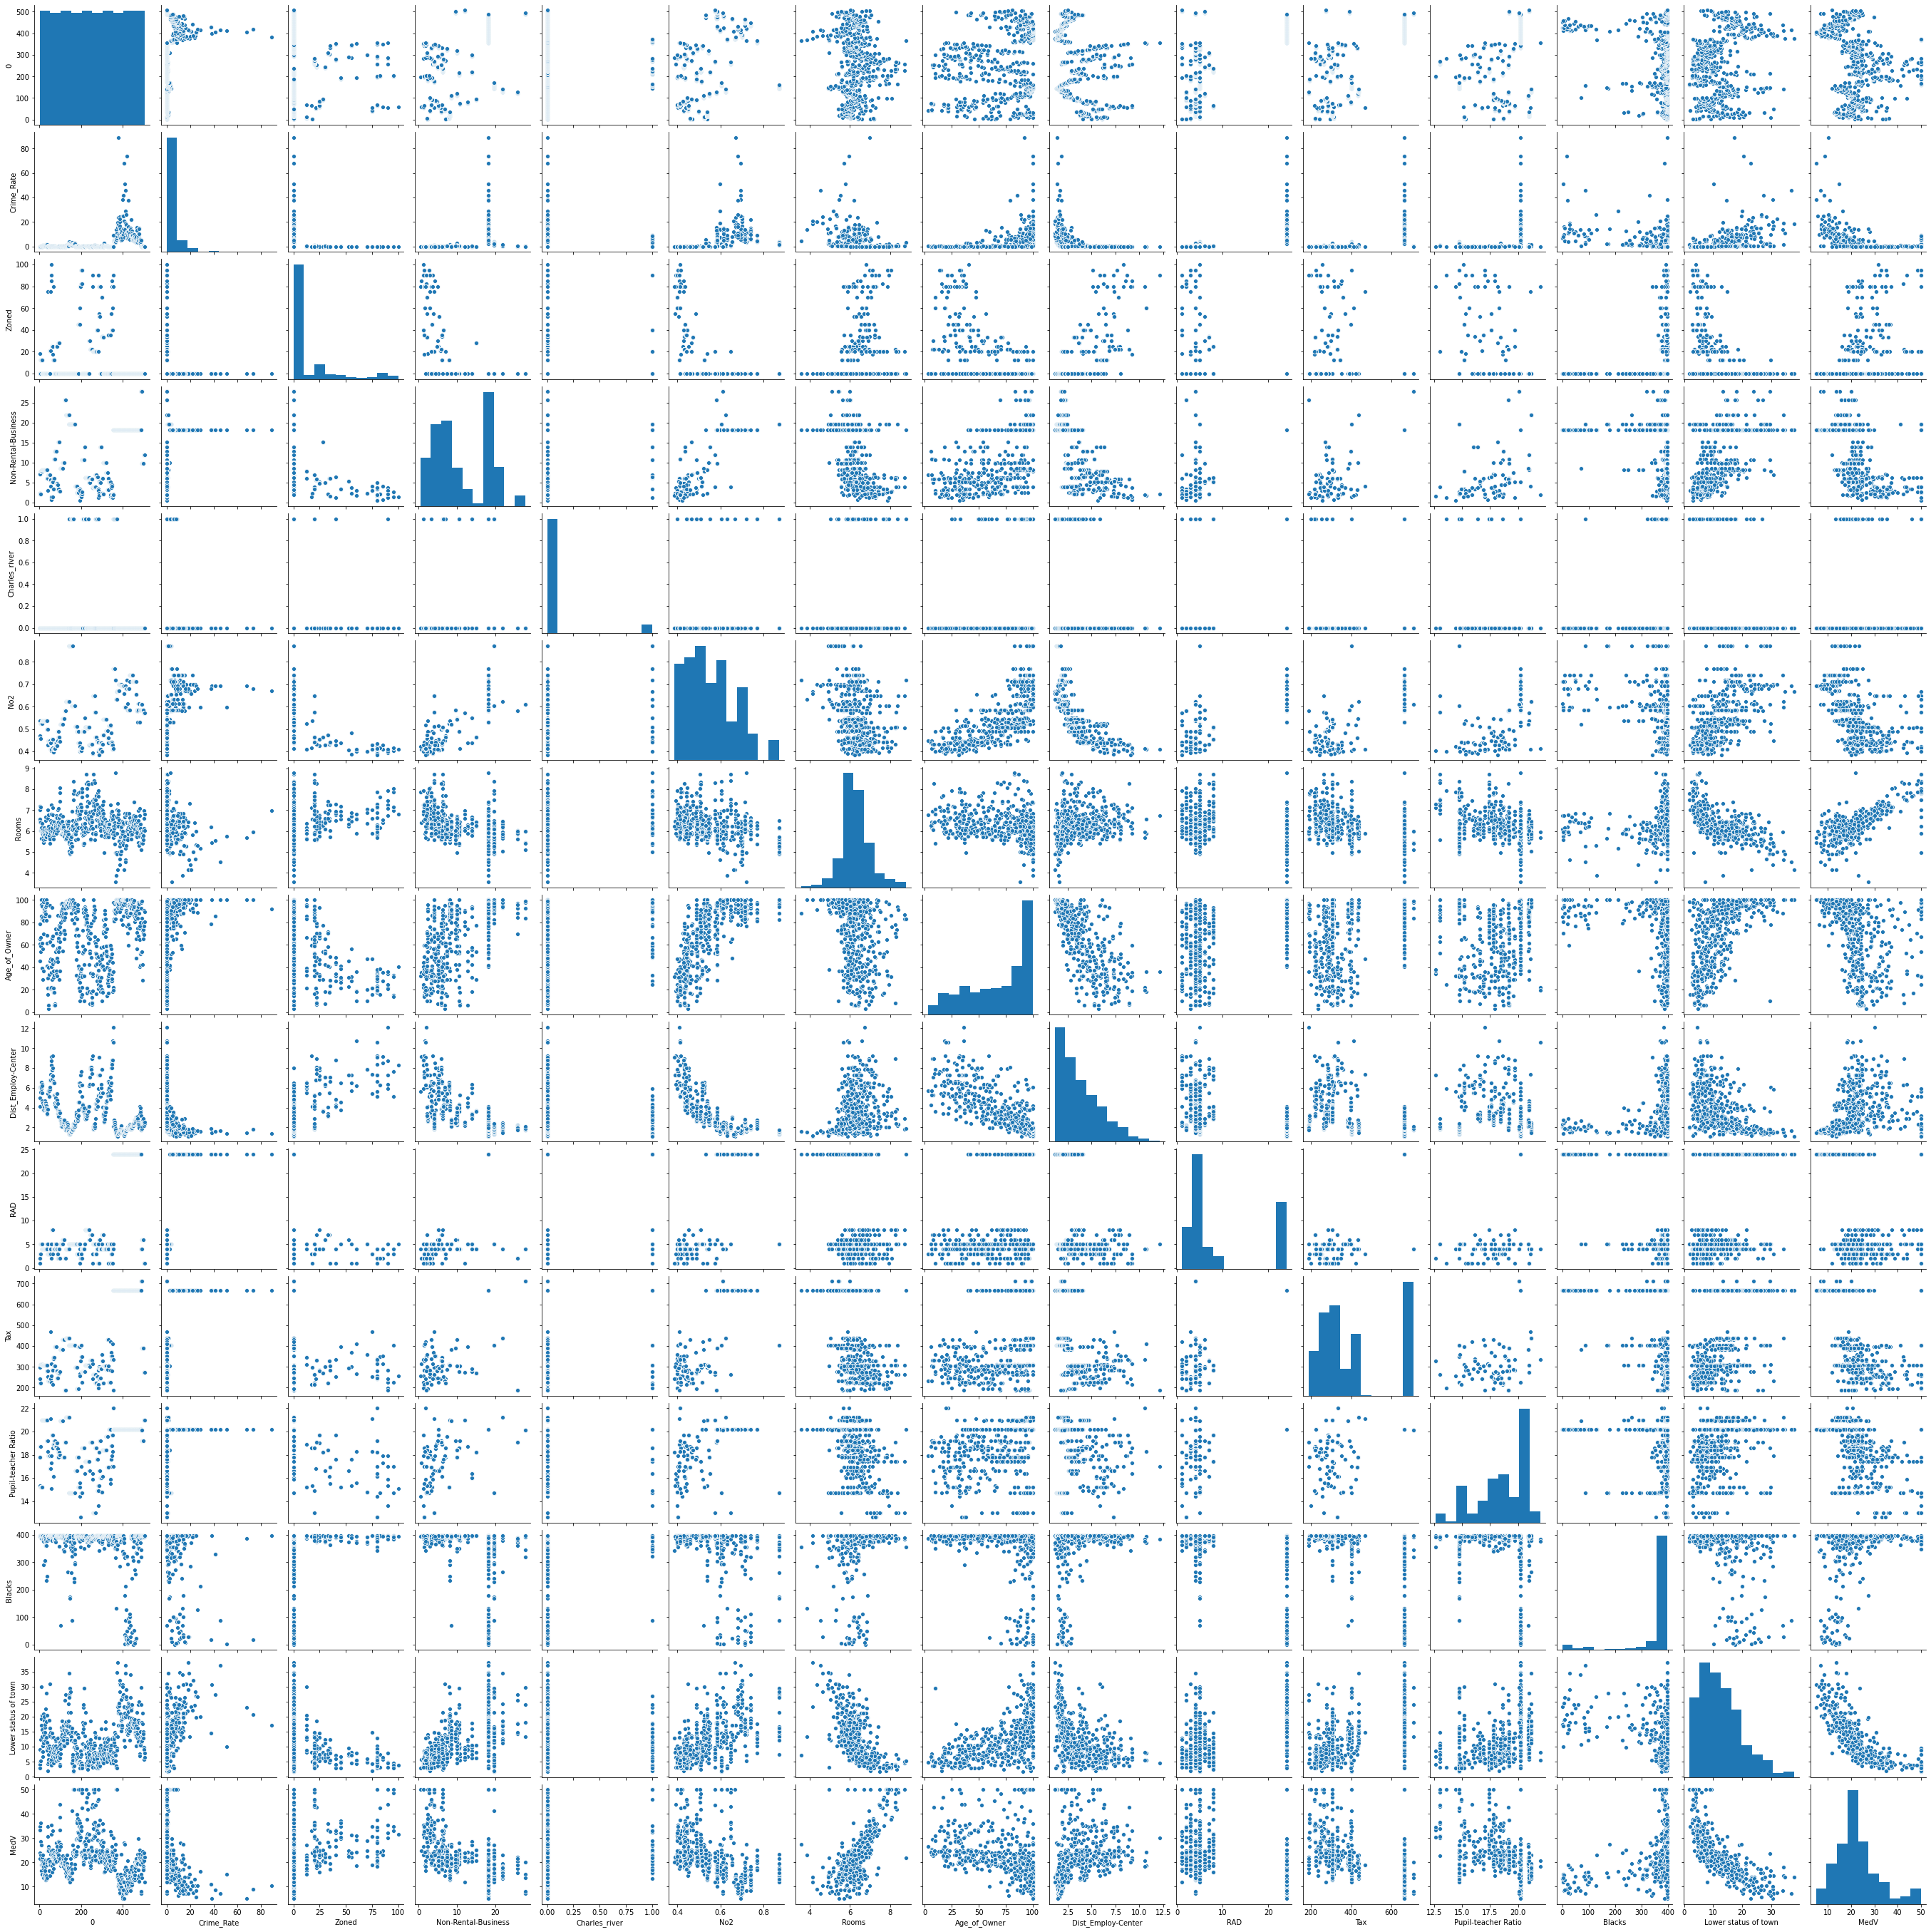

In [18]:
sns.pairplot(m)

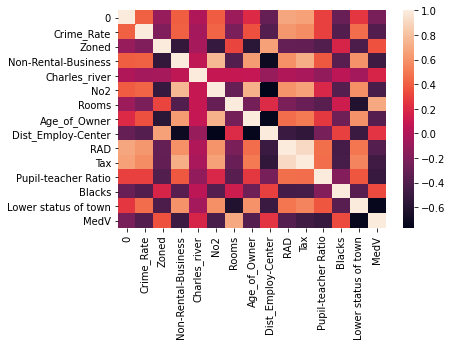

In [19]:
sns.heatmap(m.corr())

In [20]:
#x is input y is output
x = m["Rooms"]
y = m["MedV"]

# Linear Regression for model creation , testing , training

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

Split the train test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Reshaping the sets

In [25]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

Fitting the model

In [26]:
result = model.fit(x_train,y_train)

Coefficient 

In [27]:
print("Coefficient = ",model.coef_)

Coefficient =  [9.03907314]


Intercept

In [28]:
print("Intercept = ",model.intercept_)

Intercept =  -34.222352346325316


Predicting price(X_train)

In [29]:
y_pred = model.predict(x_test)

Ploting actual and predited values

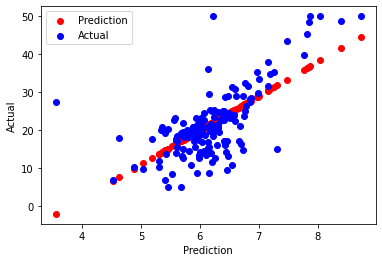

In [30]:
plt.scatter(x_test,y_pred, c = "r" , label = "Prediction")
plt.scatter(x_test,y_test, c = "b" , label = "Actual")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.legend()
plt.show()


# Multiple Regression

Considering 13 inputs for prediction

In [32]:
x1 = m[["Crime_Rate","Zoned","Non-Rental-Business","Charles_river","No2","Rooms","Age_of_Owner","Dist_Employ-Center","RAD","Tax","Pupil-teacher Ratio","Blacks","Lower status of town"]]

Target 

In [33]:
y1 = m["MedV"]

In [34]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [35]:
model2 = LinearRegression()

Fitting model 2

In [36]:
model2.fit(x1_train,y1_train)

LinearRegression()

In [37]:
print("Coefficient = ",model2.coef_)

Coefficient =  [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [38]:
print("Intercept = ",model2.intercept_)

Intercept =  33.33497575563604


In [39]:
y1_pred = model2.predict(x1_test)

In [41]:
#accuracy of model
accuracy = model2.score(x1_test,y1_test)
print("Accuracy =",accuracy)

Accuracy = 0.7261570836552486


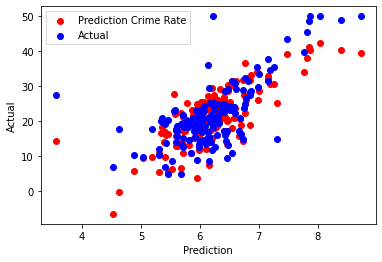

In [42]:
plt.scatter(x1_test["Rooms"],y1_pred, c = "r" , label = "Prediction Crime Rate")
plt.scatter(x1_test["Rooms"],y1_test, c = "b" , label = "Actual")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.legend()
plt.show()


In [43]:
#Model1 Performance MSE(Mean squared error)
print("Model1 performance",np.mean((y_pred - y_test)**2))
#Model2 Performance MSE(Mean squared error)
print("Model2 performance",np.mean((y1_pred - y1_test)**2))

Model1 performance 39.091051114869956
Model2 performance 20.724023437339692


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [45]:
#For Model 1
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))

mean_squared_error 39.09105111486995
mean_absolute_error 4.271512885857222


In [46]:
#For Model 2
print("mean_squared_error",mean_squared_error(y1_test,y1_pred))
print("mean_absolute_error",mean_absolute_error(y1_test,y1_pred))

mean_squared_error 20.72402343733968
mean_absolute_error 3.1482557548168164
